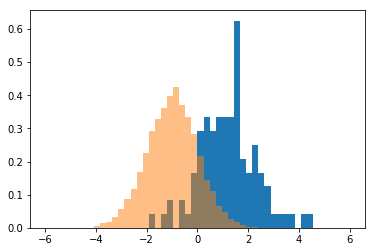

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings

delphi = np.genfromtxt('delphi.csv', delimiter=",", dtype=float).flatten()
delphi_995p = np.genfromtxt('delphi_995p_pmip3_ipsl.csv', delimiter=",", dtype=float).flatten()
volc = -np.genfromtxt('sigl.txt', delimiter=",", dtype=float).flatten()
volc_source = np.genfromtxt('volc_source_850_1850.csv', delimiter=",", dtype=float).flatten()

foo = np.random.normal(loc=1, size=100) # a normal distribution
bar = np.random.normal(loc=-1, size=10000) # a normal distribution

_, bins, _ = plt.hist(foo, bins=50, range=[-6, 6], normed=True)
_ = plt.hist(bar, bins=bins, alpha=0.5, normed=True)

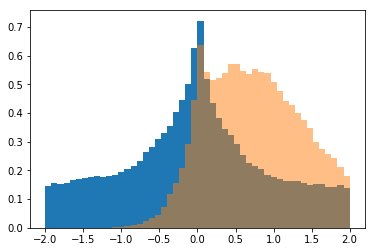

In [9]:
N=10000
win = 240 # window = 10 years
delphi_dist_1 = np.zeros((N,win))
delphi_995p_dist_1 = np.zeros((N,win))

for i in range(N):
    rand_year = random.sample(range(0, delphi.shape[0]-win), 1)
    delphi_window = delphi[rand_year[0]:rand_year[0]+win]
    delphi_995p_window = delphi_995p[rand_year[0]:rand_year[0]+win]
    delphi_dist_1[i,:] = (delphi_window - delphi_window[0])/np.pi
    delphi_995p_dist_1[i,:] = (delphi_995p_window - delphi_995p_window[0])/np.pi
    
delphi_dist_2 = delphi_dist_1.flatten()
delphi_995p_dist_2 = delphi_995p_dist_1.flatten()

_, bins, _ = plt.hist(delphi_dist_2, bins=50, range=[-2, 2], normed=True)
_ = plt.hist(delphi_995p_dist_2, bins=bins, alpha=0.5, normed=True)

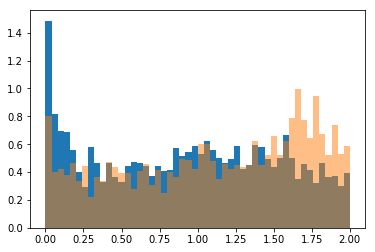

In [10]:
N=100000
win = 240 # window = 20 years
delphi_dist_1 = np.zeros((N,win))
delphi_995p_dist_1 = np.zeros((N,win))
volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12)) 
    if volc_source[volc_year] != 1.0 : # Tropical Eruptions only
        continue
    if volc[volc_year] < 3.7 : # Large Volcanic eruptions
        continue
    delphi_window = delphi[rand_year[0]:rand_year[0]+win]
    delphi_995p_window = delphi_995p[rand_year[0]:rand_year[0]+win]
    delphi_dist_1[i,:] = (delphi_window - np.min(delphi_window))#/np.pi
    delphi_995p_dist_1[i,:] = (delphi_995p_window - np.min(delphi_995p_window))#/np.pi
    i = i + 1
delphi_dist_2 = delphi_dist_1.flatten()
delphi_995p_dist_2 = delphi_995p_dist_1.flatten()

_, bins, _ = plt.hist(delphi_dist_2, bins=50, range=[0, 2], normed=True)
_ = plt.hist(delphi_995p_dist_2, bins=bins, alpha=0.5, normed=True)

In [11]:
N=100000
win = 240 # window = 20 years
delphi_dist_1 = np.zeros((N,win))
delphi_995p_dist_1 = np.zeros((N,win))
volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12)) 
    if volc_source[volc_year] != 1.0 : # Tropical Eruptions only
        continue
    if volc[volc_year] < 3.7 : # Large Volcanic eruptions
        continue
    delphi_window = delphi[rand_year[0]:rand_year[0]+win]
    delphi_995p_window = delphi_995p[rand_year[0]:rand_year[0]+win]
    delphi_dist_1[i,:] = (delphi_window[:] - np.min(delphi_window))
    delphi_995p_dist_1[i,:] = (delphi_995p_window[:] - np.min(delphi_995p_window))
    i = i + 1

In [12]:
import sys
import numpy as np
import matplotlib.pyplot as pl
def _binwidth_fd(arr):
    """
    Returns bin width for given sample as per Freedman-Diaconis' rule.


    As per this rule, bin width h is defined as:
                    h = 2 (IQR) NS ^ (-1/3)
    References
    ----------
    https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule
    """
    n = float(len(arr))
    iqr = np.percentile(arr, 75.) - np.percentile(arr, 25.)
    return 2. * iqr * np.power(n, -1. / 3.)

months_joint_dist = np.zeros((N*(win)))
delphi_joint_dist = delphi_dist_1.flatten()
delphi_995p_joint_dist = delphi_995p_dist_1.flatten()
for i in range(N):
    for j in range(win):
        months_joint_dist[i*(win)+j] = j

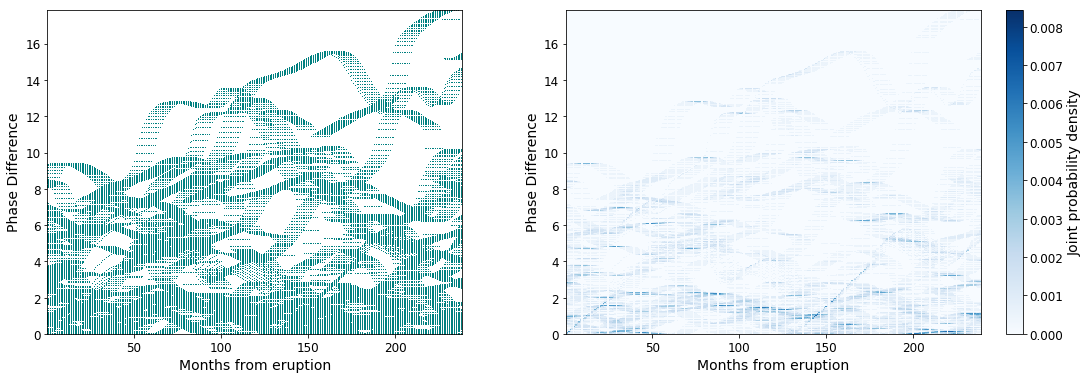

In [13]:
s1, s2 = np.asarray(months_joint_dist) , np.asarray(delphi_joint_dist)

## use numpy.histogram2d to get joint distributions
## ------------------------------------------------
# bin widths
h1 = _binwidth_fd(s1)
h2 = _binwidth_fd(s2)
# range of values
m1, M1 = s1.min(), s1.max()
m2, M2 = s2.min(), s2.max()
# number of bins
nb1 = (M1 - m1) / h1
nb2 = (M2 - m2) / h2
# histogram
H, be1, be2 = np.histogram2d(x=s1, y=s2, bins=[nb1, nb2], normed=True)
# bin centers
bc1 = 0.5 * (be1[1:] + be1[:-1])
bc2 = 0.5 * (be2[1:] + be2[:-1])

## plot the results
# set up figure and axes
fig = pl.figure(figsize=[18., 6.])      # 18 in x 6 in figure
ax1 = fig.add_axes([0.10, 0.15, 0.32, 0.75])
ax2 = fig.add_axes([0.50, 0.15, 0.40, 0.75])
axlabfs = 14                            # axis label font size
tiklabfs = 12                           # axis tick labels size
# plot a scatter plot in axes ax1
ax1.plot(s1, s2, ".", mfc="Teal", mec="none", alpha=0.25, ms=1.)
# plot the 2D joint density stored in H as pcolormesh in axes ax2
xx, yy = np.meshgrid(bc1, bc2)
im2 = ax2.pcolormesh(xx, yy, H.T, cmap=pl.cm.Blues, rasterized=True)
cb2 = pl.colorbar(im2)

## prettify axes
## -------------
# ensure that the scatter plot axis limits is the same as the pcolormesh
ax1.set_xlim(ax2.get_xlim())
ax1.set_ylim(ax2.get_ylim())
# axis labels
for ax in [ax1, ax2]:
    ax.set_xlabel("Months from eruption", fontsize=axlabfs)
    ax.set_ylabel("Phase Difference", fontsize=axlabfs)
# tick labels
for ax in fig.axes:
    ax.tick_params(labelsize=tiklabfs)
cb2.set_label("Joint probability density", fontsize=axlabfs)

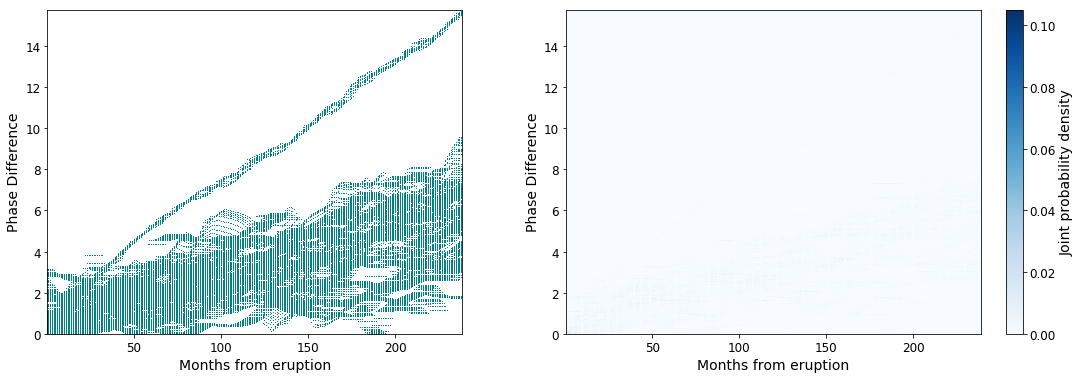

In [14]:
s1, s2 = np.asarray(months_joint_dist) , np.asarray(delphi_995p_joint_dist)

## use numpy.histogram2d to get joint distributions
## ------------------------------------------------
# bin widths
h1 = _binwidth_fd(s1)
h2 = _binwidth_fd(s2)
# range of values
m1, M1 = s1.min(), s1.max()
m2, M2 = s2.min(), s2.max()
# number of bins
nb1 = (M1 - m1) / h1
nb2 = (M2 - m2) / h2
# histogram
H, be1, be2 = np.histogram2d(x=s1, y=s2, bins=[nb1, nb2], normed=True)
# bin centers
bc1 = 0.5 * (be1[1:] + be1[:-1])
bc2 = 0.5 * (be2[1:] + be2[:-1])

## plot the results
# set up figure and axes
fig = pl.figure(figsize=[18., 6.])      # 18 in x 6 in figure
ax1 = fig.add_axes([0.10, 0.15, 0.32, 0.75])
ax2 = fig.add_axes([0.50, 0.15, 0.40, 0.75])
axlabfs = 14                            # axis label font size
tiklabfs = 12                           # axis tick labels size
# plot a scatter plot in axes ax1
ax1.plot(s1, s2, ".", mfc="Teal", mec="none", alpha=0.25, ms=1.)
# plot the 2D joint density stored in H as pcolormesh in axes ax2
xx, yy = np.meshgrid(bc1, bc2)
im2 = ax2.pcolormesh(xx, yy, H.T, cmap=pl.cm.Blues, rasterized=True)
cb2 = pl.colorbar(im2)

## prettify axes
## -------------
# ensure that the scatter plot axis limits is the same as the pcolormesh
ax1.set_xlim(ax2.get_xlim())
ax1.set_ylim(ax2.get_ylim())
# axis labels
for ax in [ax1, ax2]:
    ax.set_xlabel("Months from eruption", fontsize=axlabfs)
    ax.set_ylabel("Phase Difference", fontsize=axlabfs)
# tick labels
for ax in fig.axes:
    ax.tick_params(labelsize=tiklabfs)
cb2.set_label("Joint probability density", fontsize=axlabfs)